In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import shutil
from keras.models import save_model, load_model

Using TensorFlow backend.


In [12]:
classifier_url="https://tfhub.dev/google/imagenet/mobilenet_v1_100_128/feature_vector/4"

In [28]:
pokemon_data=pd.read_csv('input/pokemon.csv')#,index_col='Name')

In [32]:
first_gen=pokemon_data[pokemon_data['Generation']==1]

In [33]:
first_gen

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,...,Blue,True,0.500,Water_1,Dragon,False,1.80,3.3,45,serpentine_body
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,...,Blue,True,0.500,Water_1,Dragon,False,3.99,16.5,45,serpentine_body
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,...,Brown,True,0.500,Water_1,Dragon,False,2.21,210.0,45,bipedal_tailed
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,...,Purple,False,NaN,Undiscovered,NaN,True,2.01,122.0,3,bipedal_tailed


# Dividing data of each pokemon into class folders

In [11]:
# image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     zoom_range=0.2)
image_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_gen.flow_from_directory('input/PokemonData',target_size=(128,128),color_mode='rgb')

Found 6820 images belonging to 150 classes.


In [24]:
# classifier=tf.keras.Sequential(hub.KerasLayer(classifier_url,input_shape= (128,128,3)))
# classifier.trainable = False
model=tf.keras.Sequential([
    hub.KerasLayer(classifier_url,trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(image_data.num_classes, activation='softmax')])
model.build([None, 128, 128, 3])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   multiple                  3228864   
_________________________________________________________________
dense_2 (Dense)              multiple                  153750    
Total params: 3,382,614
Trainable params: 153,750
Non-trainable params: 3,228,864
_________________________________________________________________


In [12]:
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 128, 128, 3)
Label batch shape:  (32, 150)


In [27]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [28]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=10)

In [29]:
steps = np.floor(image_data.samples/image_data.batch_size)

In [31]:
history = model.fit(image_data, epochs=100, steps_per_epoch= steps
                    , callbacks=[early_stop])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 213.0 steps
Epoch 1/100
213/213 [==============================] - 96s 453ms/step - loss: 2.1158 - accuracy: 0.5303
Epoch 2/100
213/213 [==============================] - 95s 444ms/step - loss: 0.6265 - accuracy: 0.8724
Epoch 3/100
213/213 [==============================] - 97s 455ms/step - loss: 0.3060 - accuracy: 0.9492
Epoch 4/100
213/213 [==============================] - 95s 444ms/step - loss: 0.1710 - accuracy: 0.9826
Epoch 5/100
213/213 [==============================] - 93s 439ms/step - loss: 0.1025 - accuracy: 0.9929
Epoch 6/100
213/213 [==============================] - 93s 437ms/step - loss: 0.0706 - accuracy: 0.9950
Epoch 7/100
213/213 [==============================] - 92s 433ms/step - loss: 0.0533 - accuracy: 0.9954
Epoch 8/100
213/213 [==============================] - 93s 435ms/step - loss: 0.0421 - accuracy: 0.9959
Epoch 9/100
213/213 [==============================] - 95s 445ms/step - loss: 0.0348 - accuracy: 0.9963
Epoch 10/100
213/213 [====================

In [117]:
model.save('PokemonModel5')

INFO:tensorflow:Assets written to: PokemonModel5/assets


INFO:tensorflow:Assets written to: PokemonModel5/assets


In [15]:
class_names = np.array(list(image_data.class_indices.keys()))

In [38]:
class_names

array(['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok',
       'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise',
       'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard',
       'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster',
       'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo',
       'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee',
       'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor',
       'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude',
       'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler',
       'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan',
       'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon',
       'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan',
       'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp',
       'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton',
     

In [13]:
check_data=image_gen.flow_from_directory('test_pokemon',target_size=(128,128))

Found 30 images belonging to 1 classes.


In [134]:
predicted_batch = model.predict(check_data)
pred_id = np.argmax(predicted_batch,axis = -1)
predicted_label_batch = class_names[pred_id]
actual_id = np.argmax(label_batch, axis=-1)

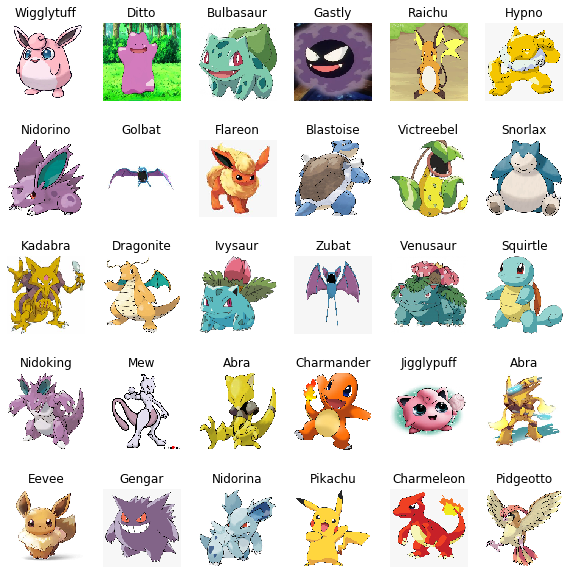

In [135]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(check_data[0][0][i])
#     color ="green" if pred_id[i] == actual_id[i] else "red" 
    plt.title(predicted_label_batch[i])
    plt.axis('off')
plt.show()

In [124]:
tf.saved_model.save(model,'Models/Pokemon_Model6')

INFO:tensorflow:Assets written to: Models/Pokemon_Model6/assets


INFO:tensorflow:Assets written to: Models/Pokemon_Model6/assets


# LOADING MODEL AND USING IT FOR PREDICTION

In [2]:
new_model=tf.keras.models.load_model('Models/Pokemon_Model')
new_model.build([None, 128, 128, 3])

In [3]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   multiple                  3228864   
_________________________________________________________________
dense_2 (Dense)              multiple                  153750    
Total params: 3,382,614
Trainable params: 153,750
Non-trainable params: 3,228,864
_________________________________________________________________


In [16]:
predicted_batch = new_model.predict(check_data)
pred_id = np.argmax(predicted_batch,axis = -1)
predicted_label_batch = class_names[pred_id]
actual_id = np.argmax(label_batch, axis=-1)

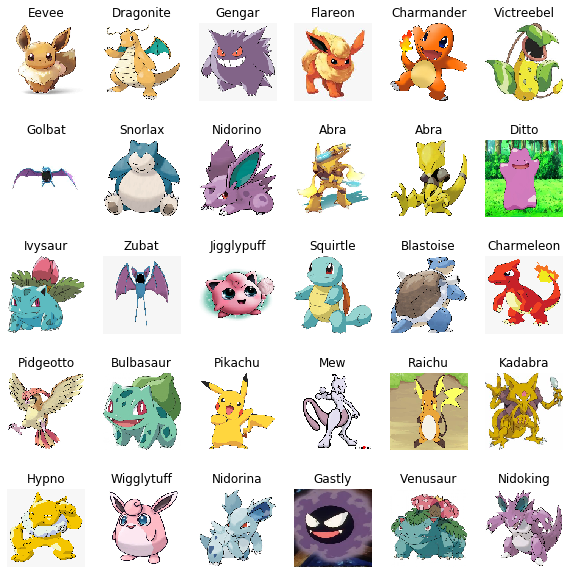

In [17]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(check_data[0][0][i])
#     color ="green" if pred_id[i] == actual_id[i] else "red" 
    plt.title(predicted_label_batch[i])
    plt.axis('off')
plt.show()

# Predicting Attributes of Predicted Pokemon

In [53]:
print('Primary Type: {}'.format((pokemon_data[pokemon_data['Name']==predicted_label_batch[0]].values)[0,2]))

Primary Type: Dragon


In [56]:
pokemon_data[pokemon_data['Name']==predicted_label_batch[0]]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
132,133,Eevee,Normal,NaN,325,55,55,50,45,65,...,Brown,True,0.875,Field,NaN,False,0.3,6.5,45,quadruped
